# Business Understanding

Dalam kasus ini, permsalahan yang didapat yaitu tentang klasifikasi biner. Mencari informasi dan prediksi apakah seseorang mempunyai penyakit jantung atau tidak

# Data Understanding

Data asli berasal dari database Cleveland dari UCI Machine Learning Repository.
Database asli berisi 76 atribut, tetapi di sini hanya 14 atribut yang akan digunakan, atribut juga disebut fitur.
Atribut dan fitur juga disebut sebagai variabel bebas dan variabel terikat, saya menggunakan variabel bebas untuk memprediksi variabel terikat.
Dalam data ini, variabel bebas adalah atribut informasi pasien dan variabel terikat adalah apakah mereka memiliki penyakit jantung atau tidak.

Berikut ini adalah fitur yang akan saya gunakan untuk memprediksi variabel target (penyakit jantung atau tidak ada penyakit jantung).

age - Usia dalam tahun
sex - (1 = male; 0 = female)
cp - chest pain type
0: Typical angina: nyeri dada terkait mengurangi suplai darah ke jantung
1: Atypical angina: nyeri dada tidak berhubungan dengan jantung
2: Non-anginal pain: biasanya kejang esofagus (tidak berhubungan dengan jantung)
3: Asymptomatic: nyeri dada tidak menunjukkan tanda-tanda penyakit
trestbps - mengistirahatkan tekanan darah (dalam mm Hg saat masuk ke rumah sakit
di atas 130-140 biasanya memprihatinkan
chol - serum cholestoral dalam mg/dl
serum = LDL + HDL + .2 * triglycerides
di atas 200 yang memprihatinkan
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
restecg - resting electrocardiographic results
0: Tidak ada yang perlu diperhatikan
1: ST-T Wave abnormality
dapat berkisar dari gejala ringan hingga masalah parah
sinyal detak jantung yang tidak normal
2: Possible or definite left ventricular hypertrophy
Ruang pompa utama jantung yang diperbesar
thalach - denyut jantung maksimum tercapai
exang - latihan diinduksi angina (1 = yes; 0 = no)
oldpeak - Depresi ST yang disebabkan oleh olahraga relatif terhadap istirahat
melihat stres jantung saat berolahraga
jantung yang tidak sehat akan lebih stres
slope - kemiringan segmen ST latihan puncak
0: Upsloping: detak jantung yang lebih baik dengan olahraga (tidak biasa)
1: Flatsloping: perubahan minimal (jantung sehat yang khas)
2: Downslopins: tanda-tanda jantung yang tidak sehat
ca - jumlah pembuluh darah utama (0-3) diwarnai oleh flourosopy
pembuluh berwarna berarti dokter dapat melihat darah yang melewatinya
semakin banyak gerakan darah semakin baik (tidak ada gumpalan)
thal - hasil stres thalium
1,3: normal
6: fixed defect: dulu cacat tapi sekarang baik-baik saja
7: reversable defect: tidak ada gerakan darah yang tepat saat berolahraga
target - memiliki penyakit atau tidak (1=yes, 0=no) (= atribut yang diprediksi)




# Import Library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay




In [3]:
df = pd.read_csv ('/content/drive/MyDrive/Projek/Penyakit Jantung/heart.csv')
df.shape

(303, 14)

# Exploratory Data Analyst

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


## Melihat Missing Value

In [6]:
# melihat data yang hilang
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Frekuensi Jenis Kelamin

In [9]:
# Cari tahu berapa banyak nilai dari target
df["target"].value_counts().sort_values(ascending=True)

,count
target,
0,138
1,165


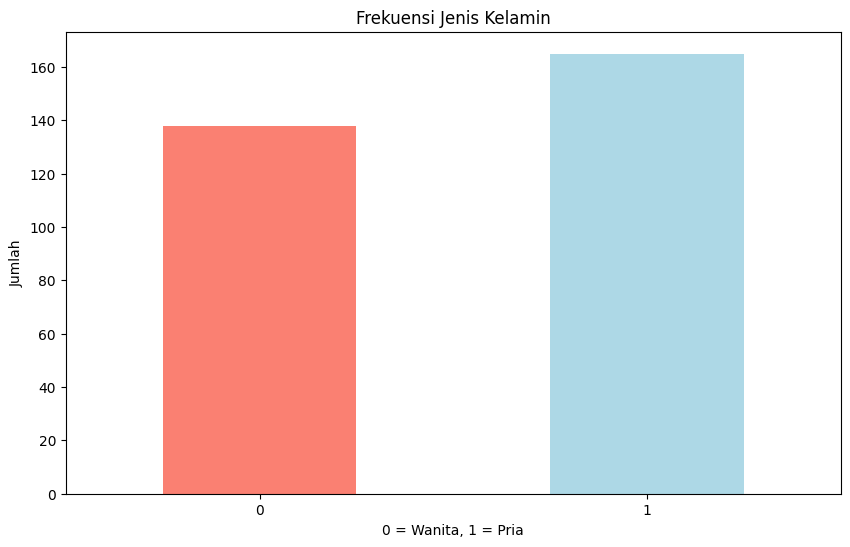

In [10]:
df["target"].value_counts().sort_values(ascending=True).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"]);

plt.title("Frekuensi Jenis Kelamin")
plt.xlabel("0 = Wanita, 1 = Pria")
plt.ylabel("Jumlah")
plt.xticks(rotation=0);

## Frekuensi Penyakit Jantung Berdasarkan Jenis Kelamin

In [11]:
df.sex.value_counts()

,count
sex,
1,207
0,96


In [12]:
# bandingkan kolom target dengan sex
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


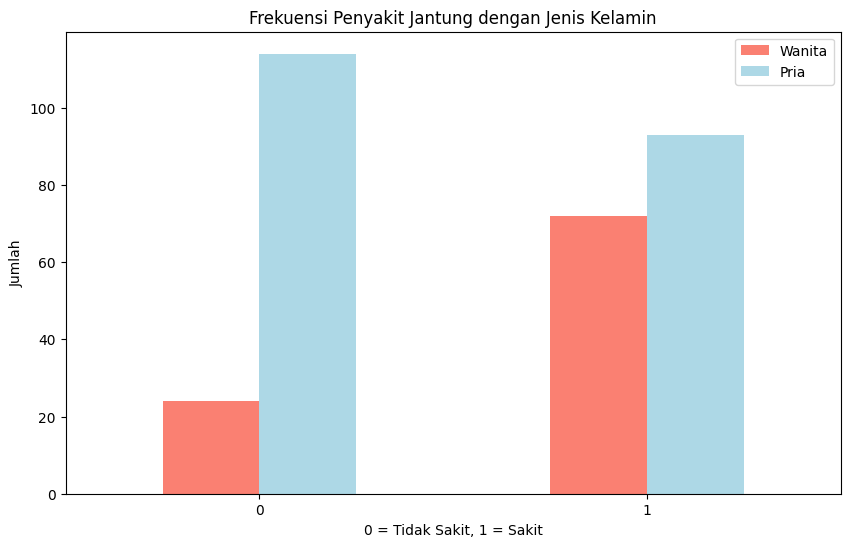

In [13]:
# membuat plot crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"]);

plt.title("Frekuensi Penyakit Jantung dengan Jenis Kelamin");
plt.xlabel("0 = Tidak Sakit, 1 = Sakit");
plt.ylabel("Jumlah");
plt.legend(["Wanita", "Pria"]);
plt.xticks(rotation=0);

Karena ada 96 pasien wanita dan 72 diantaranya memiliki nilai positif penyakit jantung, jika pasiennya adalah seorang wanita, ada kemungkinan 75% dia menderita penyakit jantung.

Sedangkan untuk pasien pria, ada 207 hampir setengahnya 45% kemungkinan menunjukkan adanya penyakit jantung.

Jadi dapat disimpulkan berdasarkan grafik di atas, kemungkinan seseorang terkena penyakit jantung adalah 59%.

## Usia dan Denyut Jantung Maksimal

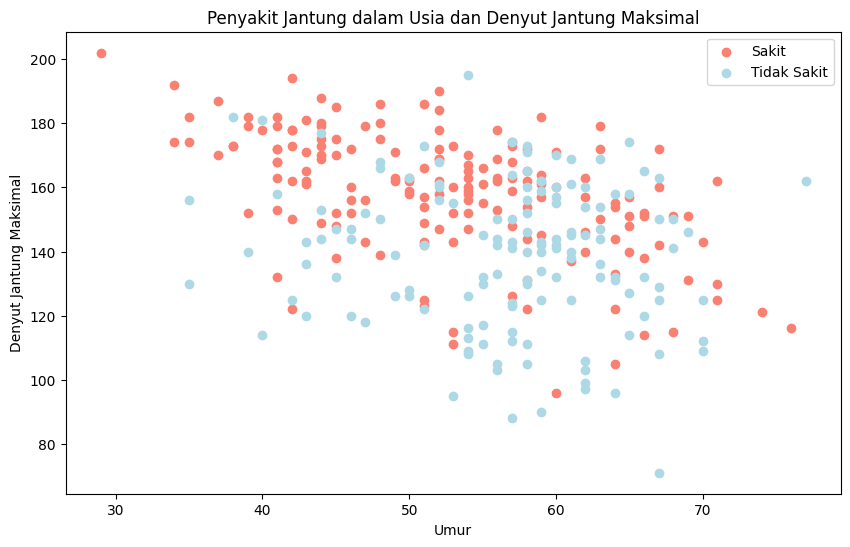

In [14]:
plt.figure(figsize=(10, 6))

# scatter
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

plt.title("Penyakit Jantung dalam Usia dan Denyut Jantung Maksimal")
plt.xlabel("Umur")
plt.ylabel("Denyut Jantung Maksimal")
plt.legend(["Sakit", "Tidak Sakit"]);

Pada scatter plot diatas tampak semakin muda seseorang, semakin tinggi detak jantung maksimum mereka.

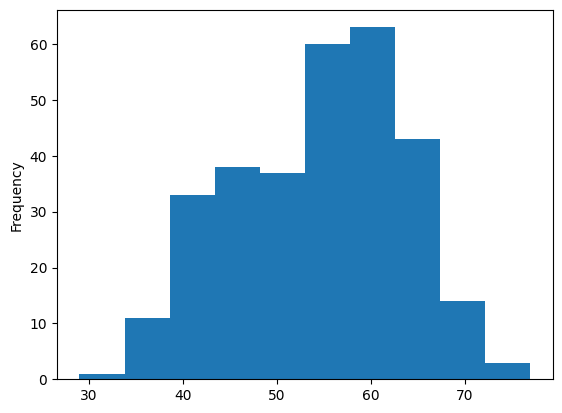

In [15]:
# cek distribusi kolom umur
df.age.plot.hist();

Ini adalah distribusi normal tetapi sedikit bergeser kekanan.

## Frekuensi Penyakit Jantung Berdasarkan Nyeri Dada

In [16]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


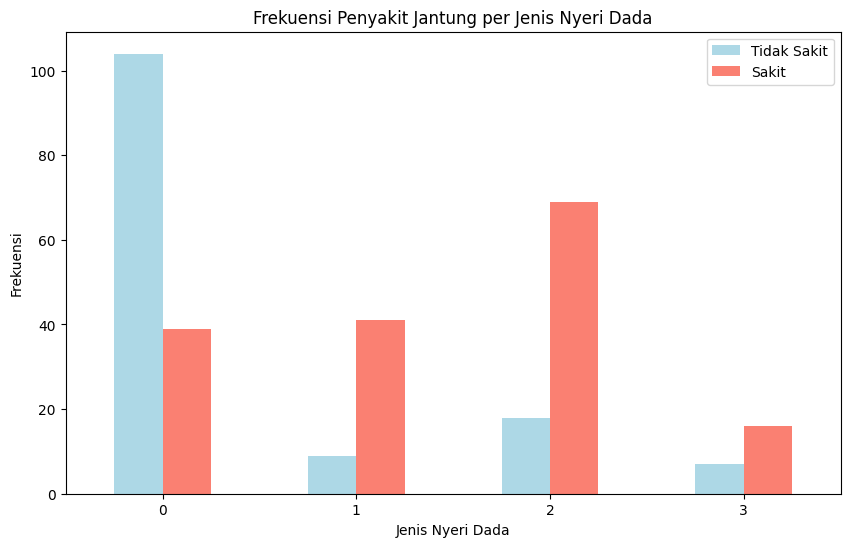

In [17]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["lightblue", "salmon"])

plt.title("Frekuensi Penyakit Jantung per Jenis Nyeri Dada")
plt.xlabel("Jenis Nyeri Dada")
plt.ylabel("Frekuensi")
plt.legend(["Tidak Sakit", "Sakit"])
plt.xticks(rotation=0);


cp - chest pain type
*   0: Typical angina: nyeri dada terkait mengurangi suplai darah ke jantung
*   1: Atypical angina: nyeri dada tidak berhubungan dengan jantung
*   2: Non-anginal pain: biasanya kejang esofagus (tidak berhubungan dengan jantung)
*   3: Asymptomatic: nyeri dada tidak menunjukkan tanda-tanda penyakit

Bagian yang menarik disini, Atypical Angina(1) menyatakan itu tidak berhubungan dengan jantung tetapi tampaknya memiliki rasio yang lebih tinggi daripada Typical Angina(0) yang berhubungan dengan jantung.






## Korelasi Antara Variabel Bebas

In [18]:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


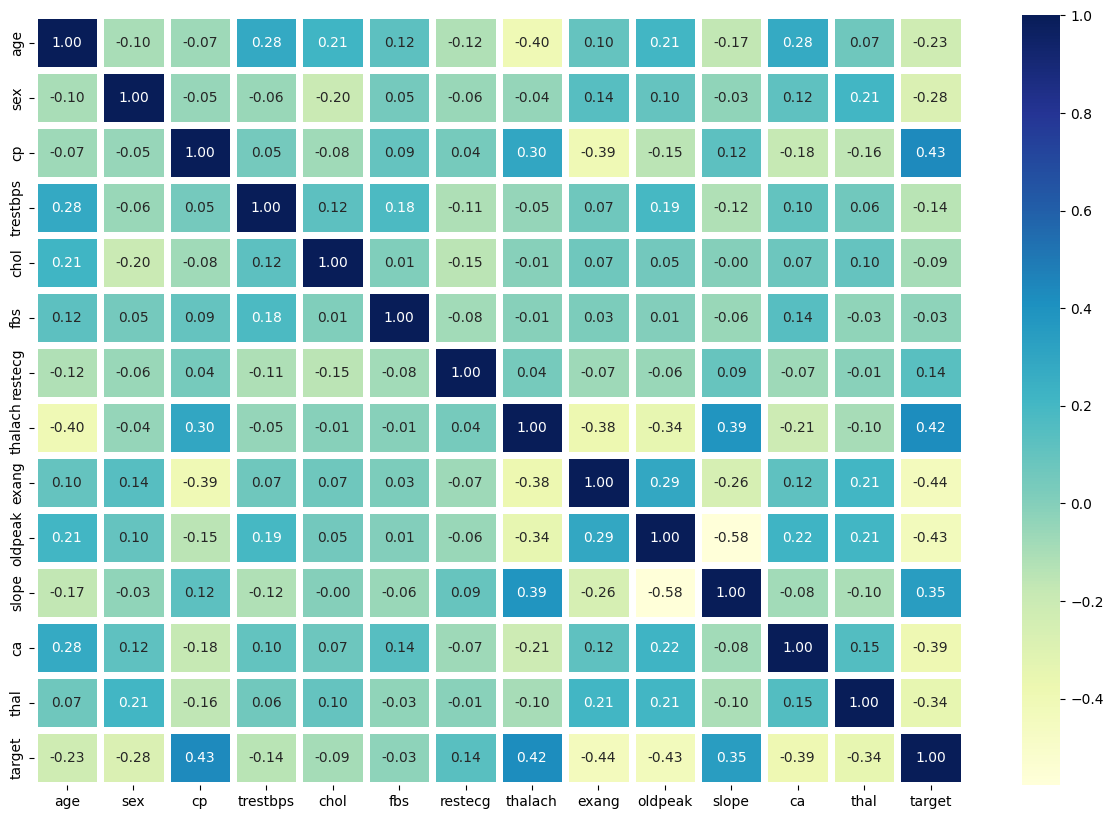

In [19]:
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidth=5,
            fmt=".2f",
            cmap="YlGnBu");

Koefisien korelasi bernilai negatif, berarti hubungan antara kedua variabel tersebut negatif atau saling berbanding terbalik. Koefisien korelasi bernilai positif, berarti hubungan antara kedua variabel tersebut positif atau saling berbanding lurus.

# Modelling

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# Data sudah dalam dataframe bernama df
X = df.drop('target', axis=1)
y = df['target']


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Random Forest

In [45]:
# ======== BAGIAN 3: RANDOM FOREST ========
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("=== Random Forest ===")
print(classification_report(y_test, rf_pred))


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



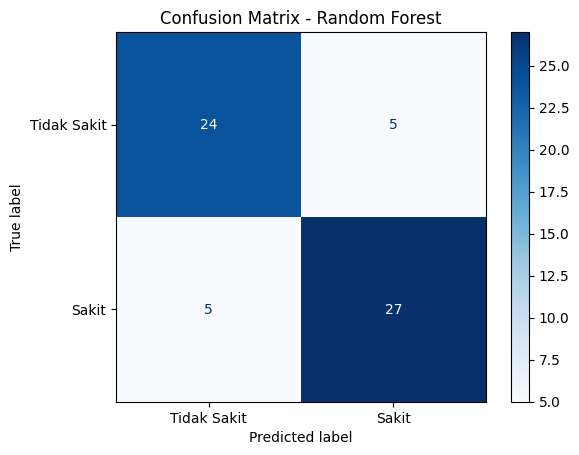

In [46]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, rf_pred)

# Visualisasi Confusion Matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Tidak Sakit", "Sakit"])
disp_rf.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.grid(False)
plt.show()

## Logistic Regression

In [49]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

print("=== Logistic Regression ===")
print(classification_report(y_test, lr_pred))


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



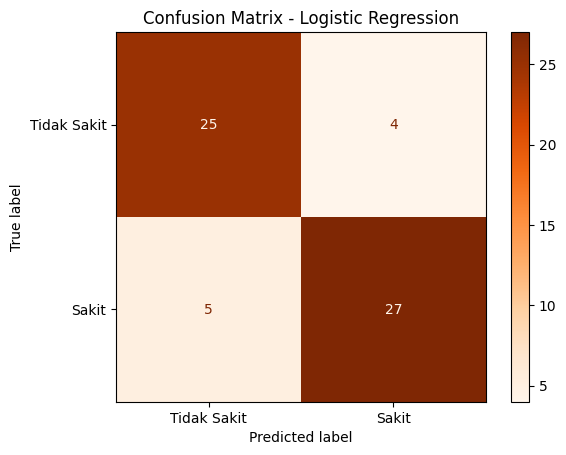

In [47]:
y_pred_lr = lr_model.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)

disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=["Tidak Sakit", "Sakit"])
disp_lr.plot(cmap="Oranges")
plt.title("Confusion Matrix - Logistic Regression")
plt.grid(False)
plt.show()


## XGBoost Classifier

In [50]:
# ======== BAGIAN 5: XGBOOST ========
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

print("=== XGBoost ===")
print(classification_report(y_test, xgb_pred))


=== XGBoost ===
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:48:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


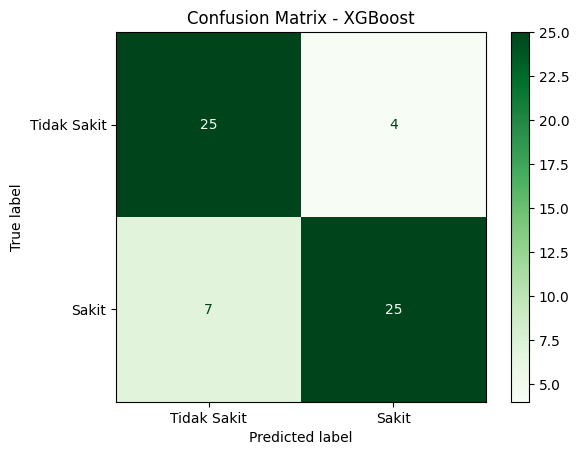

In [48]:
y_pred_xgb = xgb_model.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=["Tidak Sakit", "Sakit"])
disp_xgb.plot(cmap="Greens")
plt.title("Confusion Matrix - XGBoost")
plt.grid(False)
plt.show()


# Evaluasi

In [52]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Hitung metrik evaluasi untuk masing-masing model
results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Akurasi": [
        accuracy_score(y_test, lr_pred),
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, xgb_pred)
    ],
    "Precision (1)": [
        precision_score(y_test, lr_pred, pos_label=1),
        precision_score(y_test, rf_pred, pos_label=1),
        precision_score(y_test, xgb_pred, pos_label=1)
    ],
    "Recall (1)": [
        recall_score(y_test, lr_pred, pos_label=1),
        recall_score(y_test, rf_pred, pos_label=1),
        recall_score(y_test, xgb_pred, pos_label=1)
    ],
    "F1-Score (1)": [
        f1_score(y_test, lr_pred, pos_label=1),
        f1_score(y_test, rf_pred, pos_label=1),
        f1_score(y_test, xgb_pred, pos_label=1)
    ]
}

# Buat DataFrame
df_results = pd.DataFrame(results)

# Tampilkan tabel dengan 2 angka di belakang koma
df_results


,Model,Akurasi,Precision (1),Recall (1),F1-Score (1)
0,Logistic Regression,0.852459,0.870968,0.84375,0.857143
1,Random Forest,0.836066,0.843750,0.84375,0.843750
2,XGBoost,0.819672,0.862069,0.78125,0.819672


# RandomizedSearchCV

## Random Forest

In [53]:
from scipy.stats import randint, uniform

# ===== Random Forest =====
rf = RandomForestClassifier(random_state=42)

param_dist_rf = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

rand_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=20,            # coba 20 kombinasi acak
    cv=5,
    verbose=2,
    n_jobs=-1,
    scoring='accuracy',
    random_state=42
)

rand_search_rf.fit(X_train, y_train)
print("Best RF params:", rand_search_rf.best_params_)
print("Best RF CV accuracy:", rand_search_rf.best_score_)

best_rf = rand_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("RF Test Classification Report:")
print(classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best RF params: {'bootstrap': False, 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 70}
Best RF CV accuracy: 0.8139455782312925
RF Test Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



## Logistic Regression

In [54]:
# ===== Logistic Regression =====
lr = LogisticRegression(max_iter=1000, random_state=42)

param_dist_lr = {
    'C': uniform(0.01, 10),            # regularisasi strength
    'penalty': ['l2'],                 # bisa ditambah 'l1' jika solver mendukung
    'solver': ['lbfgs', 'saga'],       # saga support l1 & l2, lbfgs hanya l2
}

rand_search_lr = RandomizedSearchCV(
    estimator=lr,
    param_distributions=param_dist_lr,
    n_iter=20,
    cv=5,
    verbose=2,
    n_jobs=-1,
    scoring='accuracy',
    random_state=42
)

rand_search_lr.fit(X_train, y_train)
print("Best LR params:", rand_search_lr.best_params_)
print("Best LR CV accuracy:", rand_search_lr.best_score_)

best_lr = rand_search_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)
print("LR Test Classification Report:")
print(classification_report(y_test, y_pred_lr))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best LR params: {'C': np.float64(3.7554011884736247), 'penalty': 'l2', 'solver': 'lbfgs'}
Best LR CV accuracy: 0.8221088435374149
LR Test Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## XGBoost Classifier

In [55]:
# ===== XGBoost =====
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_dist_xgb = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 5)
}

rand_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist_xgb,
    n_iter=20,
    cv=5,
    verbose=2,
    n_jobs=-1,
    scoring='accuracy',
    random_state=42
)

rand_search_xgb.fit(X_train, y_train)
print("Best XGB params:", rand_search_xgb.best_params_)
print("Best XGB CV accuracy:", rand_search_xgb.best_score_)

best_xgb = rand_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
print("XGB Test Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best XGB params: {'colsample_bytree': np.float64(0.8421165132560784), 'gamma': np.float64(2.2007624686980067), 'learning_rate': np.float64(0.04661147045343365), 'max_depth': 10, 'n_estimators': 224, 'subsample': np.float64(0.5866823267538861)}
Best XGB CV accuracy: 0.8221938775510205
XGB Test Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:56:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Evaluasi

In [57]:
results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Akurasi": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    "Precision (1)": [
        precision_score(y_test, y_pred_lr, pos_label=1),
        precision_score(y_test, y_pred_rf, pos_label=1),
        precision_score(y_test, y_pred_xgb, pos_label=1)
    ],
    "Recall (1)": [
        recall_score(y_test, y_pred_lr, pos_label=1),
        recall_score(y_test, y_pred_rf, pos_label=1),
        recall_score(y_test, y_pred_xgb, pos_label=1)
    ],
    "F1-Score (1)": [
        f1_score(y_test, y_pred_lr, pos_label=1),
        f1_score(y_test, y_pred_rf, pos_label=1),
        f1_score(y_test, y_pred_xgb, pos_label=1)
    ],
}

df_results = pd.DataFrame(results)
df_results

,Model,Akurasi,Precision (1),Recall (1),F1-Score (1)
0,Logistic Regression,0.852459,0.870968,0.84375,0.857143
1,Random Forest,0.868852,0.852941,0.90625,0.878788
2,XGBoost,0.852459,0.848485,0.87500,0.861538


In [58]:
import joblib

# Simpan model terbaik Random Forest
joblib.dump(best_rf, 'random_forest_heart.pkl')


['random_forest_heart.pkl']

In [60]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
